Ejercicio 1:

In [1]:
import numpy as np

def newton_multidimensional(F, J, x0, tol=1e-7, max_iter=100):
    """
    Encuentra los ceros de una función F: R^n -> R^n usando el método de Newton multidimensional.
    
    Parámetros:
    - F: función que toma un vector x y devuelve un vector.
    - J: función que toma un vector x y devuelve la matriz Jacobiana de F en x.
    - x0: vector inicial.
    - tol: tolerancia para el criterio de convergencia.
    - max_iter: número máximo de iteraciones.
    
    Retorna:
    - lista de aproximaciones realizadas.
    - vector x* donde se encuentra el cero.
    """
    x = x0
    approximations = [x0]
    
    for i in range(max_iter):
        Fx = F(x)
        Jx = J(x)
        delta = np.linalg.solve(Jx, -Fx)
        x = x + delta
        approximations.append(x)
        
        if np.linalg.norm(delta) < tol:
            break
    
    return approximations, x

# Definir la función F y su Jacobiana J para el sistema dado
def F(x):
    return np.array([
        3*x[0] - np.cos(x[1]*x[2]) - 1/2,
        x[0]**2 - 81*(x[1] + 0.1)**2 + np.sin(x[2]) + 1.06,
        np.exp(-x[0]*x[1]) + 20*x[2] + (10*np.pi - 3)/3
    ])

def J(x):
    return np.array([
        [3, x[2]*np.sin(x[1]*x[2]), x[1]*np.sin(x[1]*x[2])],
        [2*x[0], -162*(x[1] + 0.1), np.cos(x[2])],
        [-x[1]*np.exp(-x[0]*x[1]), -x[0]*np.exp(-x[0]*x[1]), 20]
    ])

# Punto inicial
x0 = np.array([0.1, 0.1, 0.1])

# Resolver el sistema usando el método de Newton
approximations, x_star = newton_multidimensional(F, J, x0)

# Imprimir las iteraciones y el resultado final
for i, x in enumerate(approximations):
    print(f"Iteración {i}: {x}")
print(f"Solución final: {x_star}")


Iteración 0: [0.1 0.1 0.1]
Iteración 1: [ 0.50021734  0.01948961 -0.52151864]
Iteración 2: [ 0.50001427  0.00159199 -0.52355718]
Iteración 3: [ 5.00000114e-01  1.24976608e-05 -5.23598449e-01]
Iteración 4: [ 5.00000000e-01  7.82391902e-10 -5.23598776e-01]
Iteración 5: [ 5.00000000e-01  6.89057012e-18 -5.23598776e-01]
Solución final: [ 5.00000000e-01  6.89057012e-18 -5.23598776e-01]


Ejercicio 4:

EDO a.)

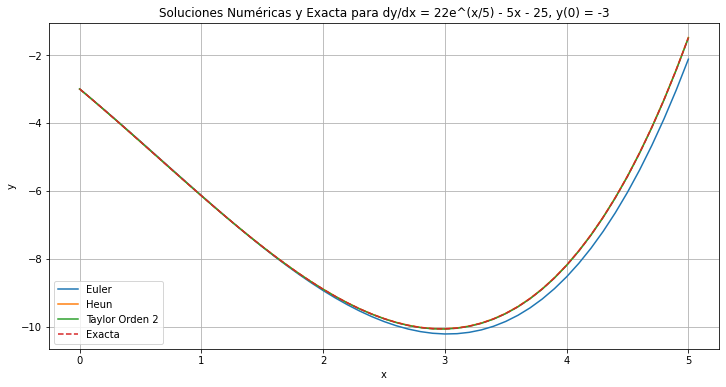

Error Euler (L2): 1.810245573218628
Error Heun (L2): 0.02301238949897688
Error Taylor Orden 2 (L2): 0.04579511534942481


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def euler(f, x0, y0, h, n):
    x = x0
    y = y0
    xs = [x]
    ys = [y]
    
    for i in range(n):
        y = y + h * f(x, y)
        x = x + h
        xs.append(x)
        ys.append(y)
    
    return np.array(xs), np.array(ys)

def heun(f, x0, y0, h, n):
    x = x0
    y = y0
    xs = [x]
    ys = [y]
    
    for i in range(n):
        k1 = h * f(x, y)
        k2 = h * f(x + h, y + k1)
        y = y + 0.5 * (k1 + k2)
        x = x + h
        xs.append(x)
        ys.append(y)
    
    return np.array(xs), np.array(ys)

def taylor_order_2(f, df, x0, y0, h, n):
    x = x0
    y = y0
    xs = [x]
    ys = [y]
    
    for i in range(n):
        y = y + h * f(x, y) + 0.5 * h**2 * df(x, y)
        x = x + h
        xs.append(x)
        ys.append(y)
    
    return np.array(xs), np.array(ys)

# Definición de la EDO para el caso a)
def f_a(x, y):
    return 22 * np.exp(x / 5) - 5 * x - 25

# Derivada de f para el método de Taylor de orden 2 para el caso a)
def df_a(x, y):
    return (22 / 5) * np.exp(x / 5) - 5

# Solución exacta para el caso a)
def exact_solution_a(x):
    return 110 * np.exp(x / 5) - (5 / 2) * x**2 - 25 * x - 113

# Parámetros de la EDO
x0_a, y0_a = 0, -3
h_a = 0.1
n_a = int(5 / h_a)  # Número de pasos para cubrir el intervalo de 0 a 5 con pasos de 0.1

# Resolver la EDO usando los métodos de Euler, Heun y Taylor de orden 2
xs_euler_a, ys_euler_a = euler(f_a, x0_a, y0_a, h_a, n_a)
xs_heun_a, ys_heun_a = heun(f_a, x0_a, y0_a, h_a, n_a)
xs_taylor_a, ys_taylor_a = taylor_order_2(f_a, df_a, x0_a, y0_a, h_a, n_a)

# Solución exacta
xs_exact_a = np.linspace(0, 5, 100)  # Más puntos para una curva suave
ys_exact_a = exact_solution_a(xs_exact_a)

# Graficar las soluciones numéricas obtenidas junto con la solución exacta
plt.figure(figsize=(12, 6))
plt.plot(xs_euler_a, ys_euler_a, label='Euler')
plt.plot(xs_heun_a, ys_heun_a, label='Heun')
plt.plot(xs_taylor_a, ys_taylor_a, label='Taylor Orden 2')
plt.plot(xs_exact_a, ys_exact_a, label='Exacta', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Soluciones Numéricas y Exacta para dy/dx = 22e^(x/5) - 5x - 25, y(0) = -3')
plt.legend()
plt.grid(True)
plt.show()

# Calcular errores L2
y_exact_euler = exact_solution_a(xs_euler_a)
y_exact_heun = exact_solution_a(xs_heun_a)
y_exact_taylor = exact_solution_a(xs_taylor_a)

error_euler = np.linalg.norm(ys_euler_a - y_exact_euler, ord=2)
error_heun = np.linalg.norm(ys_heun_a - y_exact_heun, ord=2)
error_taylor = np.linalg.norm(ys_taylor_a - y_exact_taylor, ord=2)

print(f"Error Euler (L2): {error_euler}")
print(f"Error Heun (L2): {error_heun}")
print(f"Error Taylor Orden 2 (L2): {error_taylor}")








Estan bastante cerca cada una de la solucion exacta pero la solucion usando Heun es la mas cercana.

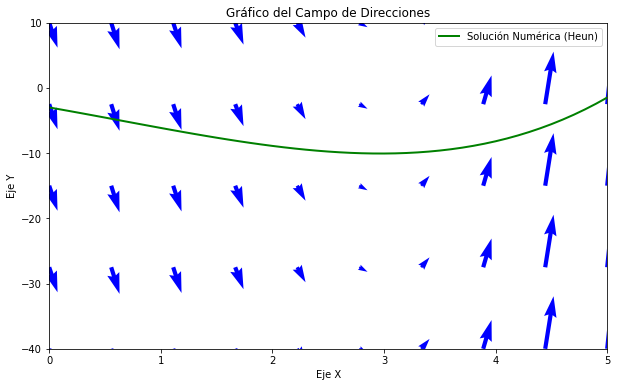

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def graficar_campo_direcciones(func, x_min, x_max, y_min, y_max, paso_x, paso_y, vector_unitario=False, mostrar_flujo=False, valores_x=None, valores_y=None, etiqueta_sol=None):
    x_vals = np.linspace(x_min, x_max, int((x_max - x_min) / paso_x))
    y_vals = np.linspace(y_min, y_max, int((y_max - y_min) / paso_y))
    X, Y = np.meshgrid(x_vals, y_vals)
    U = np.ones_like(X)
    V = func(X, Y)
    
    if vector_unitario:
        N = np.sqrt(U**2 + V**2)
        U, V = U / N, V / N
    
    plt.figure(figsize=(10, 6))
    plt.quiver(X, Y, U, V, color='blue')
    
    if mostrar_flujo:
        plt.streamplot(X, Y, U, V, color='magenta')
    
    if valores_x is not None and valores_y is not None:
        plt.plot(valores_x, valores_y, label=etiqueta_sol, linewidth=2, color='green')
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Gráfico del Campo de Direcciones')
    if etiqueta_sol:
        plt.legend()
    plt.show()

# Definición de la función EDO para el ejemplo
def edo_ejemplo(x, y):
    return 22 * np.exp(x / 5) - 5 * x - 25

# Parámetros para la EDO
x_inicial, y_inicial = 0, -3
h = 0.1
x_final = 5

# Método de Heun para resolver la EDO
def metodo_heun(func, x0, y0, h, num_pasos):
    x = x0
    y = y0
    lista_x = [x]
    lista_y = [y]
    
    for _ in range(num_pasos):
        k1 = h * func(x, y)
        k2 = h * func(x + h, y + k1)
        y += 0.5 * (k1 + k2)
        x += h
        lista_x.append(x)
        lista_y.append(y)
    
    return np.array(lista_x), np.array(lista_y)

num_pasos = int((x_final - x_inicial) / h)  # Número de pasos para cubrir el intervalo de 0 a 5 con pasos de 0.1
sol_x_heun, sol_y_heun = metodo_heun(edo_ejemplo, x_inicial, y_inicial, h, num_pasos)

# Graficar el campo de direcciones y la solución numérica obtenida por el método de Heun
graficar_campo_direcciones(
    edo_ejemplo,
    x_min=0,
    x_max=5,
    y_min=-40,
    y_max=10,
    paso_x=0.5,
    paso_y=10,
    vector_unitario=False,
    mostrar_flujo=False,
    valores_x=sol_x_heun,
    valores_y=sol_y_heun,
    etiqueta_sol='Solución Numérica (Heun)'
)



EDO b.)

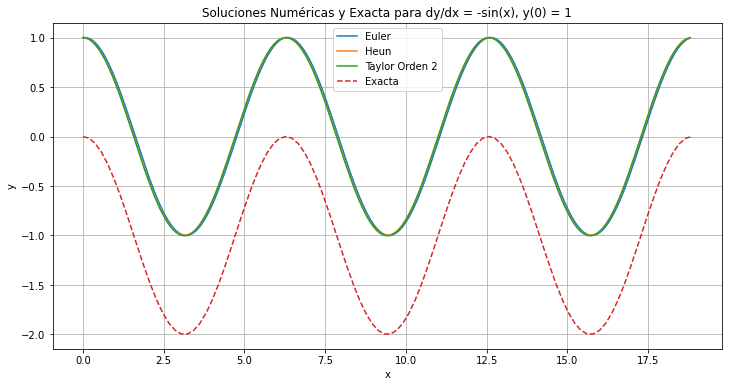

Error Euler (L2): 13.767671456284994
Error Heun (L2): 13.759157243437299
Error Taylor Orden 2 (L2): 13.72488682054387


In [11]:
import numpy as np
import matplotlib.pyplot as plt

def euler(f, x0, y0, h, n):
    x = x0
    y = y0
    xs = [x]
    ys = [y]
    
    for i in range(n):
        y = y + h * f(x, y)
        x = x + h
        xs.append(x)
        ys.append(y)
    
    return np.array(xs), np.array(ys)

def heun(f, x0, y0, h, n):
    x = x0
    y = y0
    xs = [x]
    ys = [y]
    
    for i in range(n):
        k1 = h * f(x, y)
        k2 = h * f(x + h, y + k1)
        y = y + 0.5 * (k1 + k2)
        x = x + h
        xs.append(x)
        ys.append(y)
    
    return np.array(xs), np.array(ys)

def taylor_order_2(f, df, x0, y0, h, n):
    x = x0
    y = y0
    xs = [x]
    ys = [y]
    
    for i in range(n):
        y = y + h * f(x, y) + 0.5 * h**2 * df(x, y)
        x = x + h
        xs.append(x)
        ys.append(y)
    
    return np.array(xs), np.array(ys)

# Definición de la EDO para el caso b
def f_b(x, y):
    return -np.sin(x)

# Derivada de f para el método de Taylor de orden 2 para el caso b
def df_b(x, y):
    return -np.cos(x)

# Solución exacta para el caso b
def exact_solution_b(x):
    return np.cos(x) - 1

# Parámetros de la EDO
x0_b, y0_b = 0, 1
h_b = 0.1
x_final_b = 6 * np.pi
n_b = int(x_final_b / h_b)  # Número de pasos para cubrir el intervalo de 0 a 6π con pasos de 0.1

# Resolver la EDO usando los métodos de Euler, Heun y Taylor de orden 2
xs_euler_b, ys_euler_b = euler(f_b, x0_b, y0_b, h_b, n_b)
xs_heun_b, ys_heun_b = heun(f_b, x0_b, y0_b, h_b, n_b)
xs_taylor_b, ys_taylor_b = taylor_order_2(f_b, df_b, x0_b, y0_b, h_b, n_b)

# Solución exacta
xs_exact_b = np.linspace(0, x_final_b, 100)  # Más puntos para una curva suave
ys_exact_b = exact_solution_b(xs_exact_b)

# Graficar las soluciones numéricas obtenidas junto con la solución exacta
plt.figure(figsize=(12, 6))
plt.plot(xs_euler_b, ys_euler_b, label='Euler')
plt.plot(xs_heun_b, ys_heun_b, label='Heun')
plt.plot(xs_taylor_b, ys_taylor_b, label='Taylor Orden 2')
plt.plot(xs_exact_b, ys_exact_b, label='Exacta', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Soluciones Numéricas y Exacta para dy/dx = -sin(x), y(0) = 1')
plt.legend()
plt.grid(True)
plt.show()

# Calcular errores L2
y_exact_euler_b = exact_solution_b(xs_euler_b)
y_exact_heun_b = exact_solution_b(xs_heun_b)
y_exact_taylor_b = exact_solution_b(xs_taylor_b)

error_euler_b = np.linalg.norm(ys_euler_b - y_exact_euler_b, ord=2)
error_heun_b = np.linalg.norm(ys_heun_b - y_exact_heun_b, ord=2)
error_taylor_b = np.linalg.norm(ys_taylor_b - y_exact_taylor_b, ord=2)

print(f"Error Euler (L2): {error_euler_b}")
print(f"Error Heun (L2): {error_heun_b}")
print(f"Error Taylor Orden 2 (L2): {error_taylor_b}")



En este caso Taylor tiene el error mas bajo

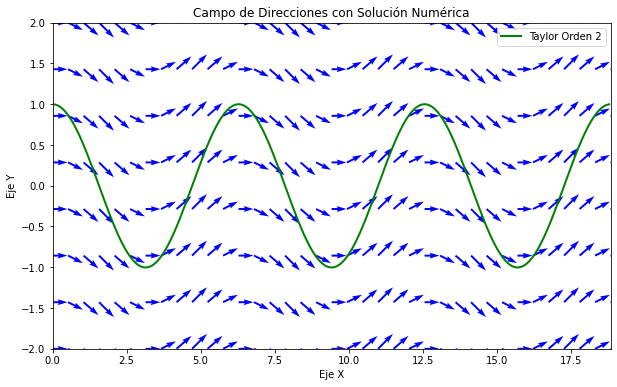

In [14]:


# Graficar el campo de direcciones y la solución numérica
def plot_direction_field(f, xmin, xmax, ymin, ymax, xstep, ystep, t_values=None, y_values=None, label_sol=None):
    x_vals = np.linspace(xmin, xmax, int((xmax - xmin) / xstep))
    y_vals = np.linspace(ymin, ymax, int((ymax - ymin) / ystep))
    X, Y = np.meshgrid(x_vals, y_vals)
    U = np.ones_like(X)
    V = f(X, Y)
    
    plt.figure(figsize=(10, 6))
    plt.quiver(X, Y, U, V, color='blue')
    
    if t_values is not None and y_values is not None:
        plt.plot(t_values, y_values, label=label_sol, linewidth=2, color='green')
    
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Campo de Direcciones con Solución Numérica')
    if label_sol:
        plt.legend()
    plt.show()

plot_direction_field(
    f_b,
    xmin=0,
    xmax=6 * np.pi,
    ymin=-2,
    ymax=2,
    xstep=0.5,
    ystep=0.5,
    t_values=xs_taylor_b,
    y_values=ys_taylor_b,
    label_sol='Taylor Orden 2'
)
